In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# 1. Transformers

## 1.1 Encodage

### Encodage ordinal

à utiliser sur des variables qualitatives ordinales (pour lesquelles il y a un ordre naturel)

**LabelEncoder()**

Ce transformer est prévu pour s'appliquer à une seule colonne, donc plutôt pour la target y par exemple

In [ ]:
y = np.array(['chat', 'chien','chat','oiseau'])

In [ ]:
encoder = LabelEncoder()
encoder.fit_transform(y)

array([0, 1, 0, 2])

In [ ]:
encoder.inverse_transform(np.array([0,0,2,2]))

array(['chat', 'chat', 'oiseau', 'oiseau'], dtype='<U6')

**OrdinalEncoder()**

Il fait la même chose mais peut s'appliquer à plusieurs colonnes, donc aux features X.

In [ ]:
X = np.array([['chien', 'poils'],
              ['chat', 'poils'],
              ['oiseau', 'plume']])

In [ ]:
encoder = OrdinalEncoder()
encoder.fit_transform(X)

array([[1., 1.],
       [0., 1.],
       [2., 0.]])

Pbm : l'ordre induit risque d'influencer les algorithmes de ML, sauf les modèles utilisant les arbres de décision
-> solution : encodage OneHot

### Encodage OneHot


à utiliser sur des variables qualitatives nominales (pour lesquelles il n'y a pas d'ordre naturel)

**LabelBinarizer()**

Ce transformer est prévu pour s'appliquer à une seule colonne, donc plutôt pour la target y par exemple

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
encoder = LabelBinarizer()
encoder.fit_transform(y)

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

prend bcp de place mais possibilité de représentation par matrice creuse (sparse matrix) :

In [ ]:
encoder = LabelBinarizer(sparse_output=True)
encoder.fit_transform(y)

<4x3 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

**OneHotEncoder()**

Il fait la même chose mais peut s'appliquer à plusieurs colonnes, donc aux features X.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder()
encoder.fit_transform(X)


<3x5 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

## 1.2 Normalisation

Pour les variables quantitatives, afin de ramener les valeurs dans un intervalle plus petit et sur une même échelle. Cette étape est indispensable, en particulier pour l'utilisation de modèles qui vont effectuer des calculs de type descente de gradient, calcul de variance, etc.

### MinMaxScaler

Répartit les données entre 0 et 1
$$
X_{scaled} = \dfrac{X - X_{min}}{X_{max}- X_{min}}
$$

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = np.array([[70],
            [80],
            [120]])

In [ ]:
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
X_minmax = MinMaxScaler().fit_transform(X)

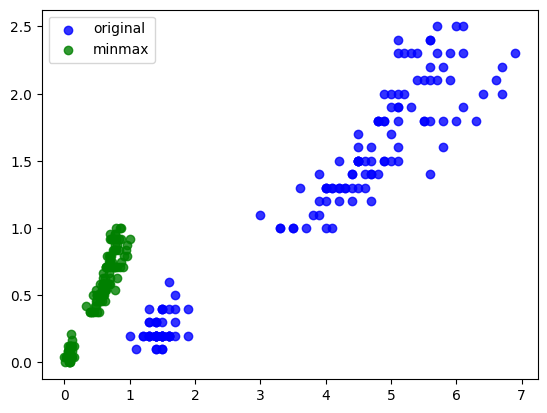

In [ ]:
plt.scatter(X[:,2], X[:,3], c = 'b', label = 'original', alpha = 0.8)
plt.scatter(X_minmax[:,2], X_minmax[:,3], c = 'g', label = 'minmax', alpha = 0.8)
plt.legend()

### Standard Scaler

Répartit les données pour avoir une moyenne de 0 et un écart-type de 1
$$
X_{scaled} = \dfrac{X - \mu_X}{\sigma_X}
$$

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = np.array([[70],
            [80],
            [120]])

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
X_std = StandardScaler().fit_transform(X)

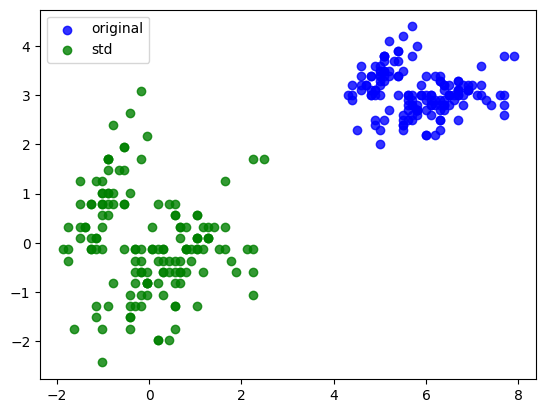

In [ ]:
plt.scatter(X[:,0], X[:,1], c = 'b', label = 'original', alpha = 0.8)
plt.scatter(X_std[:,0], X_std[:,1], c = 'g', label = 'std', alpha = 0.8)
plt.legend()

Pbm de ces 2 méthodes : sensible aux valeurs extrêmes

In [ ]:
outliers = np.full((10,4),100)+np.random.randn(10,4)
X = np.vstack((X,outliers))

In [ ]:
X_minmax = MinMaxScaler().fit_transform(X)
X_std = StandardScaler().fit_transform(X)

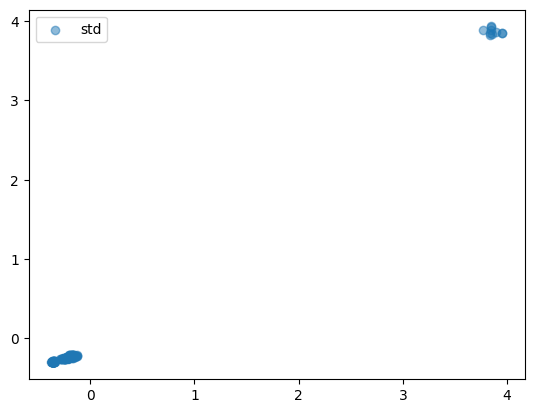

In [ ]:
#plt.scatter(X[:,2], X[:,3], alpha = 0.5, label='original')
#plt.scatter(X_std[:,2], X_minmax[:,3], alpha = 0.5, label='minmax')
plt.scatter(X_std[:,2], X_std[:,3], alpha = 0.5, label='std')
plt.legend()
plt.show()

Les valeurs "normales" se retrouvent compressées autour de 0, ce qui est très mauvais pour faire fonctionner les différents modèles...

**=> à éviter en cas de présence d'outliers**

### Robust Scaler

Répartit les données autour de la médiane
$$
X_{scaled} = \dfrac{X - Médiane}{IQR}
$$
où $IQR = Q_3 - Q_1$

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
X = np.array([[70],
            [80],
            [120]])

In [ ]:
scaler = RobustScaler()
scaler.fit_transform(X)

array([[-0.4],
       [ 0. ],
       [ 1.6]])

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
outliers = np.full((10,4),100)+np.random.randn(10,4)
X = np.vstack((X,outliers))

In [ ]:
X_minmax = MinMaxScaler().fit_transform(X)
X_std = StandardScaler().fit_transform(X)
X_robust = RobustScaler().fit_transform(X)

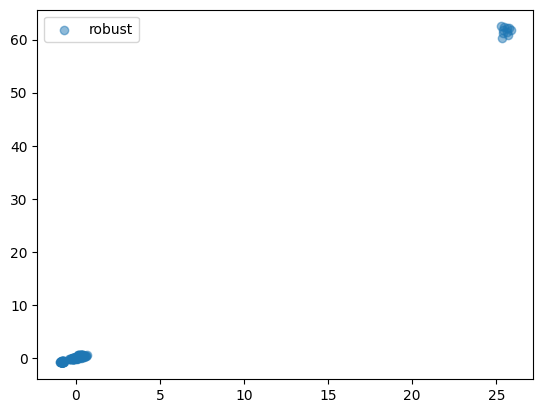

In [ ]:
#plt.scatter(X[:,2], X[:,3], alpha = 0.5, label='original')
#plt.scatter(X_minmax[:,2], X_minmax[:,3], alpha = 0.5, label='minmax')
#plt.scatter(X_std[:,2], X_std[:,3], alpha = 0.5, label='std')
plt.scatter(X_robust[:,2], X_robust[:,3], alpha = 0.5, label='robust')
plt.legend()
plt.show()

## 1.3 Autres transformers

### Polynomial Features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

X = np.array([[1],
             [2],
             [0.5]])
PolynomialFeatures(3).fit_transform(X)

array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ],
       [1.   , 0.5  , 0.25 , 0.125]])

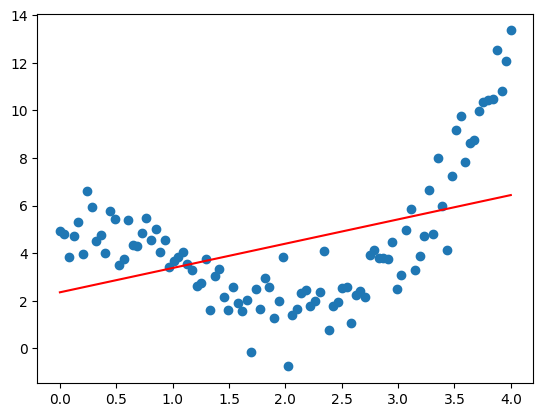

In [ ]:
from sklearn.linear_model import LinearRegression

X = np.linspace(0,4,100).reshape((100,1))
y = X**2 + 5*np.cos(X)+np.random.randn(100,1)

plt.scatter(X,y)

model = LinearRegression().fit(X,y)
y_pred = model.predict(X)

plt.plot(X,y_pred, c='r')


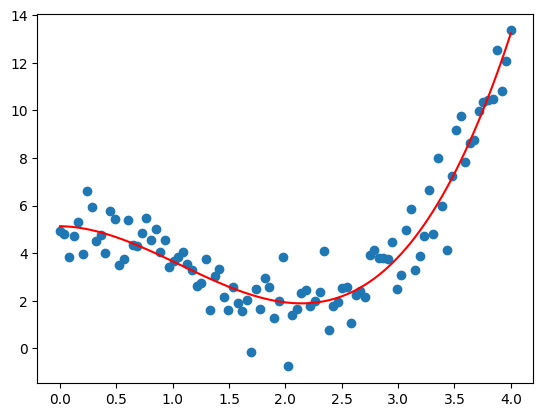

In [ ]:
X_poly = PolynomialFeatures(3).fit_transform(X)

model = LinearRegression().fit(X_poly,y)
y_pred = model.predict(X_poly)

plt.scatter(X,y)
plt.plot(X,y_pred, c='r')


### Discretiseur

Ces transformers permettent de transformer une variable quantitative continue en variable discrète, en regroupant les valeurs par catégories. Ceci peut être très utile, par exemple pour transformer l'âge en catégories (enfant, adolescent, adulte, senior par exemple).

**Binarizer**

Permet de définir 2 catégories en fonction d'un seuil.

In [ ]:
from sklearn.preprocessing import Binarizer, KBinsDiscretizer

X = np.linspace(0,5,10).reshape((10,1))
print(X)

[[0.        ]
 [0.55555556]
 [1.11111111]
 [1.66666667]
 [2.22222222]
 [2.77777778]
 [3.33333333]
 [3.88888889]
 [4.44444444]
 [5.        ]]


In [ ]:
Binarizer(threshold=3).fit_transform(X)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]])

**KBinsDiscretizer**

Permet de définir plusieurs catégories en fonction d'un seuil.

In [ ]:
KBinsDiscretizer(n_bins=6).fit_transform(X).toarray()

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

# 2. Pipeline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [ ]:
X = iris.data
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

**Sans pipeline :**

In [ ]:
# Transformer

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)

# Model
model = SGDClassifier(random_state=0)
model.fit(X_train_transformed, y_train)

# Test
X_test_transformed = scaler.transform(X_test)
model.predict(X_test_transformed)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

**Avec pipeline :**

In [ ]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), SGDClassifier())
model.fit(X_train, y_train)
model.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

 **Pipeline avec GridSearchCV :**

In [ ]:
from sklearn.model_selection import GridSearchCV

model = make_pipeline(PolynomialFeatures(),
                      StandardScaler(),
                      SGDClassifier(random_state=0))

params = {
    'polynomialfeatures__degree': [2,3,4],
    'sgdclassifier__penalty': ['l1', 'l2']
}

grid = GridSearchCV(model, param_grid = params, cv = 4)

grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [ ]:
grid.best_params_

{'polynomialfeatures__degree': 4, 'sgdclassifier__penalty': 'l1'}

In [ ]:
grid.score(X_test, y_test)

0.9736842105263158

**et sans le pre-processing, ça aurait donné quoi ?**

In [ ]:
model = SGDClassifier(random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8421052631578947

**C'est beaucoup moins bon ! => Le pre-processing, c'est la vie !**